* Importing the relevant libraries for explanatory analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# sns.set(style='whitegrid')

## 1. Getting the datasets

In [95]:
# read the datasets

from pathlib import Path

DATA_DIR = Path("../data/titanic/")
train = pd.read_csv(DATA_DIR / "train.csv", index_col="PassengerId")
test = pd.read_csv(DATA_DIR / "test.csv", index_col="PassengerId")

# join both train and test datasets
dataset = pd.concat((train, test))

In [3]:
print(f"Shape of concatenate dataset: {dataset.shape}")

Shape of concatenate dataset: (1309, 11)


In [4]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
test.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Explanatory Data Analysis

In [7]:
dataset.dtypes

Survived    float64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

* Missing values in train dataset

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
train.isna().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

* Missing values in test dataset

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [11]:
test.isna().sum().sort_values(ascending=False)

Cabin       327
Age          86
Fare          1
Embarked      0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

### 2.1 Plotting and visualization of the distributions of different variables

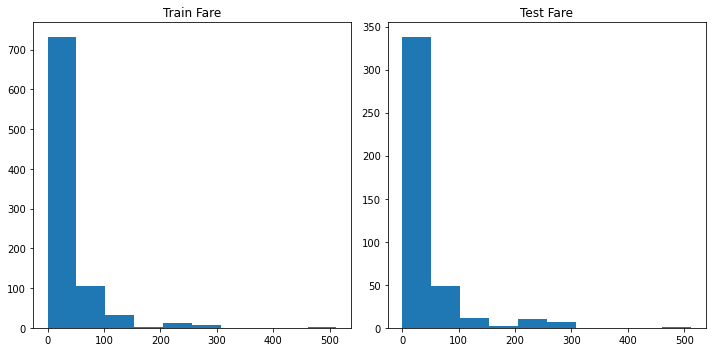

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, tight_layout=True, figsize=(10, 5))

# plot train Fare vs test Fare
ax1.hist(train.Fare, label="Train")
ax1.set_title("Train Fare")

ax2.hist(test.Fare)
ax2.set_title("Test Fare")

plt.show()

In [13]:
print(f"Ticket classes: {sorted(list(dataset.Pclass.unique()))}")

Ticket classes: [1, 2, 3]


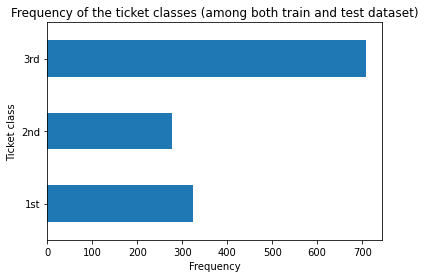

In [212]:
dataset.Pclass.value_counts().sort_index().plot(kind="barh")
plt.title("Frequency of the ticket classes (among both train and test dataset)")
plt.xlabel("Frequency")
plt.ylabel("Ticket class")
plt.yticks([0, 1, 2], ['1st', '2nd', '3rd'])
plt.show()

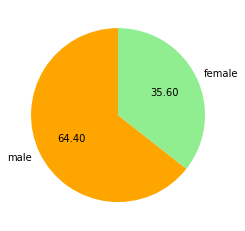

male      843
female    466
Name: Sex, dtype: int64

In [15]:
colors = ["orange", "lightgreen"]
values = [sum(dataset.Sex == "male"), sum(dataset.Sex == "female")]
plt.pie(
    values, labels=train.Sex.unique(), colors=colors, startangle=90, autopct="%2.2f"
)
plt.show()

dataset.Sex.value_counts()

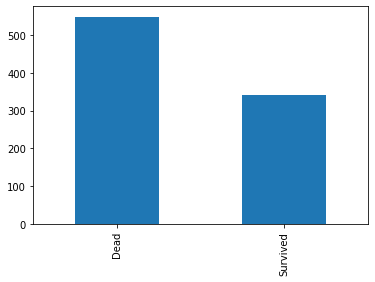

0    549
1    342
Name: Survived, dtype: int64

In [137]:
train.Survived.value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Dead', 'Survived'])
plt.show()
train.Survived.value_counts()

The figure illustrates that 549 people died and 342 survived!

Average age of passengers: 30


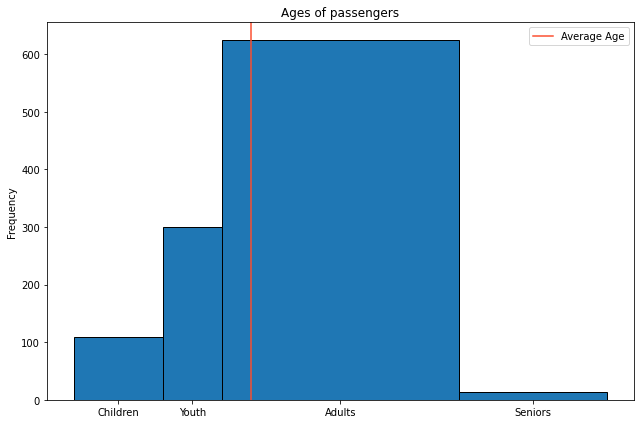

In [100]:
avg_age = round(dataset.Age.mean())
print(f"Average age of passengers: {avg_age}")
color='#fc4f30'

# age groups according to https://www.statcan.gc.ca/eng/concepts/definitions/age2
# age_groups = {"Children": 0-14, "Youth": 15-24, "Adults": 25-64, "Seniors": 65+}
plt.figure(figsize=(9, 6))
bins = [0, 15, 25, 65, 90]
# xlabels
labels = ['Children', 'Youth', 'Adults', 'Seniors']
# x ticks positions
ticks = [(bins[idx + 1] + value) / 2 for idx, value in enumerate(bins[:-1])]

plt.hist(dataset.Age, bins=bins, edgecolor='black')

plt.axvline(avg_age, color=color, label="Average Age")

plt.title("Ages of passengers")
# plt.xlabel("Ages")
plt.ylabel("Frequency")

plt.xticks(ticks=ticks, labels=labels)
plt.legend()

plt.tight_layout()

plt.show()

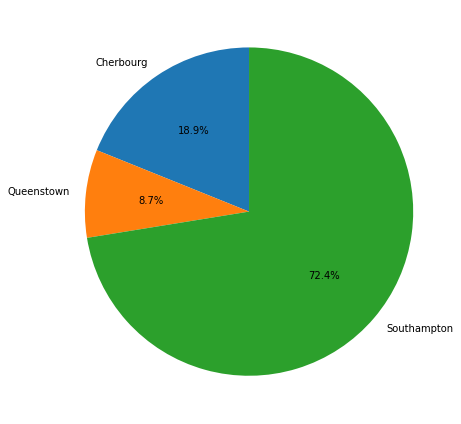

----------------------------------------
Cherbourg: 168
Queenstown: 77
Southampton: 644


In [132]:
emb_labels = {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}
emb_values = [sum(train.Embarked == embarked) for embarked in emb_labels.keys()]

plt.figure(figsize=(9, 6))
plt.pie(emb_values, labels=emb_labels.values(), startangle=90, autopct="%1.1f%%")
plt.tight_layout()
plt.show()

print("-" * 40)

for duck, size in zip(emb_labels.values(), emb_values):
    print(f"{duck}: {size}")

### 2.2 Comparing survival rates against different variables

In [176]:
a = train.loc[train.Survived == 0, 'Sex'].value_counts() / dead
b = train.loc[train.Survived == 1, 'Sex'].value_counts() / survived

In [213]:
dead, survived = dataset.Survived.value_counts()

def survived_stacked_bar(variable, dataset=train):
    dead_rates = dataset.loc[dataset.Survived == 0, variable].value_counts() / dead
    survived_rates = dataset.loc[dataset.Survived == 1, variable].value_counts() / survived
    data = pd.DataFrame([dead_rates, survived_rates], index=['Dead', 'Survived'])
    return data

In [214]:
survived_stacked_bar('Sex')

,male,female
Dead,0.852459,0.147541
Survived,0.318713,0.681287


In [215]:
men_pop, women_pop = train.Sex.value_counts()

In [195]:
male = (train.Sex == 'male')
survived = (train.Survived == 1)
len(train.loc[male & survived])

109

In [217]:
1 - 109/men_pop

0.8110918544194108

In [199]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [183]:
survived_stacked_bar('Sex')

,male,female
Dead,0.852459,0.147541
Survived,0.318713,0.681287
